In [1]:
import numpy as np
import matplotlib.pyplot as plt
from files_sorting import Txt_Reading
import pandas as pd
import os

%matplotlib inline

In [2]:
folder = "0nM"
f_MAX = [10]
save_plots = True
save_files = True 

In [3]:
def plots3(molecules, all_molecules, folder, f_max, case='Folding', save=False):
    colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
    markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
            "d", "|", "_", "4", "P"]

    fig, ax = plt.subplots(3, figsize=(6, 12))
    g = 0

    for m in range(len(molecules)):
        col = colors[m]
        for i in range(len(all_molecules[m])):
            g += 1
            lab = f'Molecule {molecules[m]}' if i == 0 else ''
            f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules[m][i][0]
            ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
            ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
            ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- {case}')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')

    if save:
        plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
def plot_single_molecule(molecules, all_molecules, folder, f_max, case='Folding', save=False):
    colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
    markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
            "d", "|", "_", "4", "P"]
    for m in range(len(molecules)):
        fig, ax = plt.subplots(3, figsize=(6, 12))
        col = colors[m]
        g = 0
        for i in range(len(all_molecules[m])):
            g += 1 
            lab = f'Molecule {molecules[m]}' if i == 0 else ''
            f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules[m][i][0]
            ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
            ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
            ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
        ax[0].grid()
        ax[0].legend(loc='best')
        ax[0].set_title(f'f_MAX = {f_max} -- {case}')
        ax[0].set_xlabel('Time [s]')
        ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

        ax[1].grid()
        ax[1].legend()
        ax[1].set_title('$x_{ssDNA}$')
        ax[1].set_ylabel('$x_{ssDNA}$')

        ax[2].grid()
        ax[2].legend()
        ax[2].set_title('# of nucleotides')
        ax[2].set_ylabel('$N_{nucleotides}$')

        if save:
            plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
        plt.show()

In [5]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

Maximum force = 10


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\ricta\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Saving results...
The images directory is created...


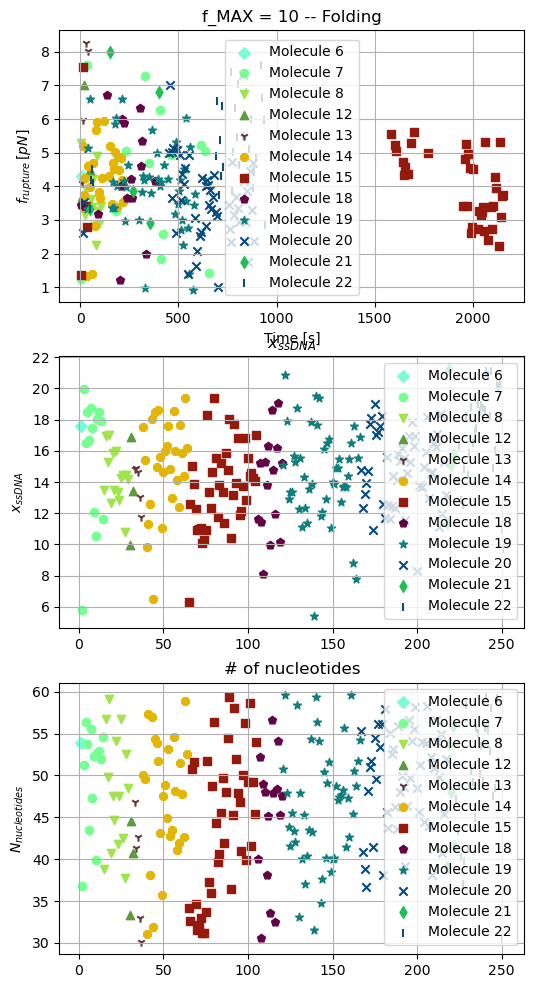

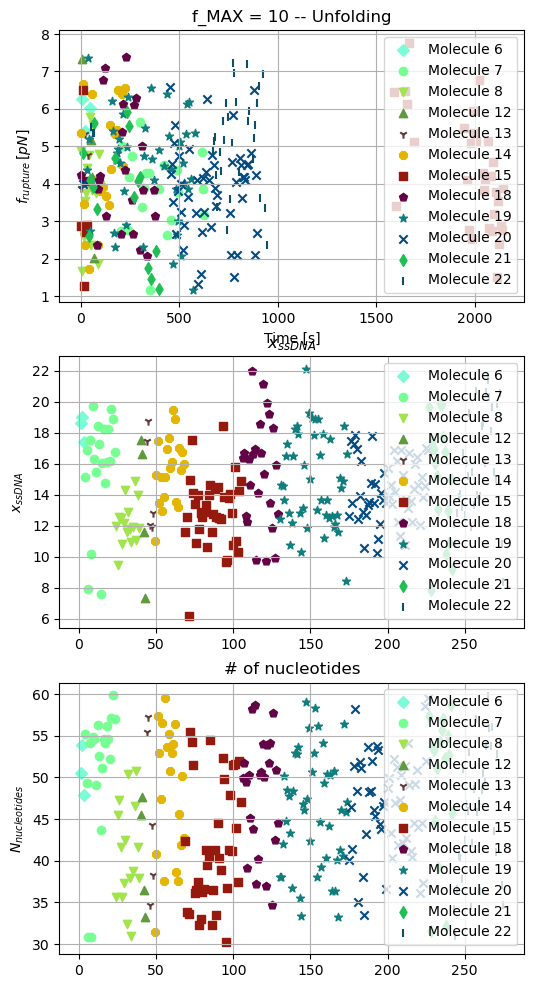

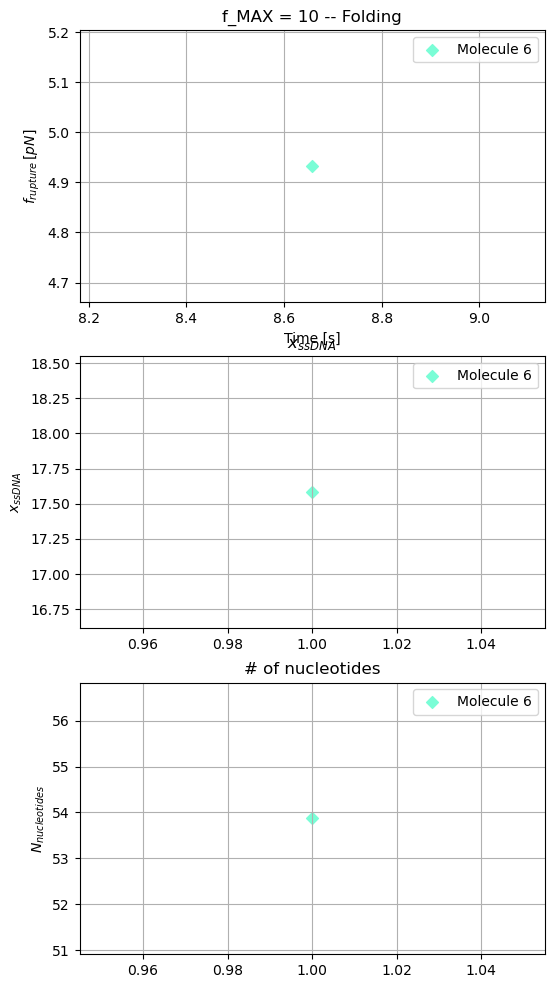

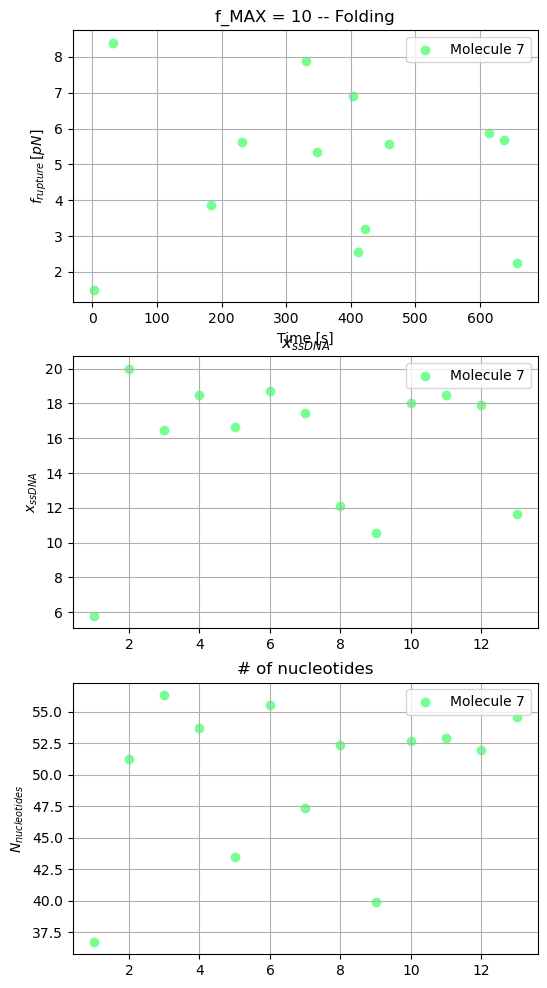

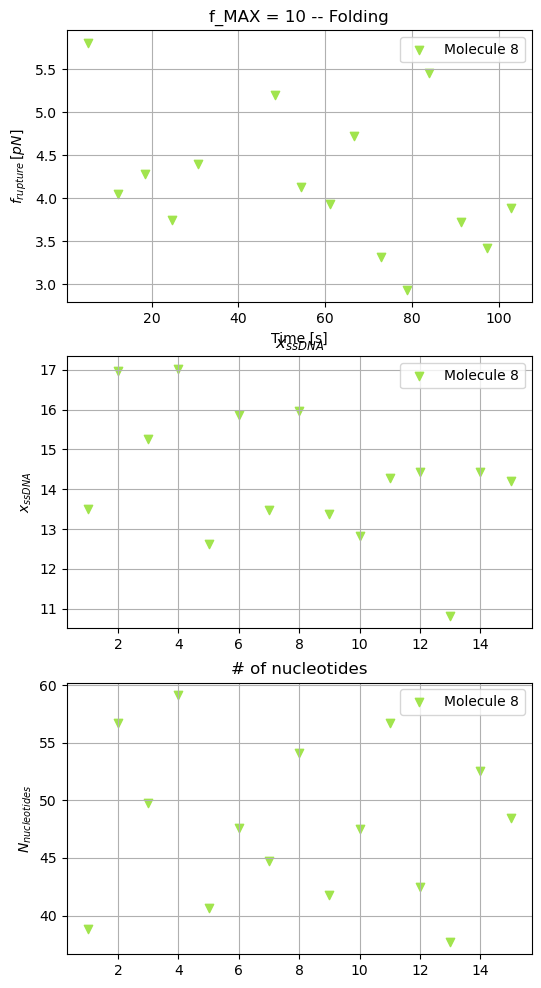

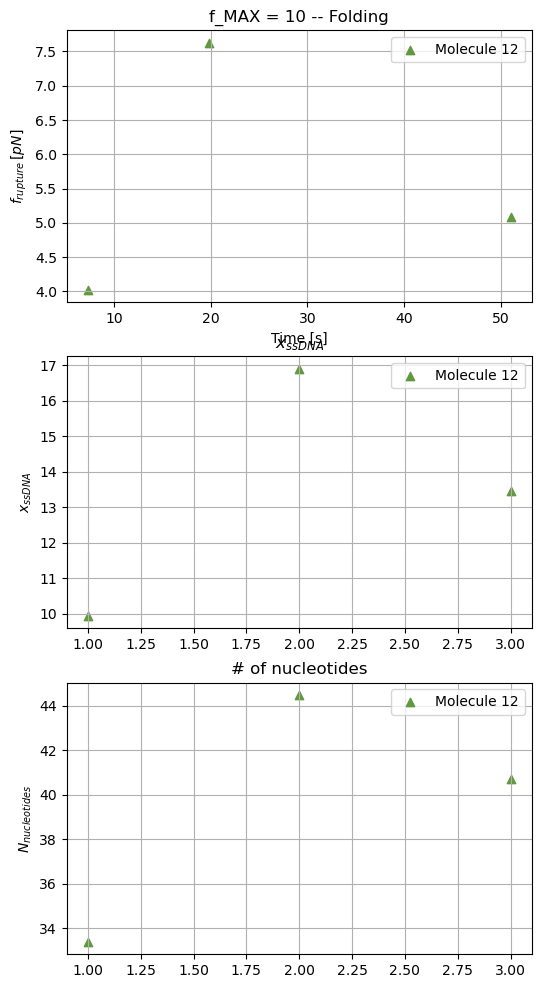

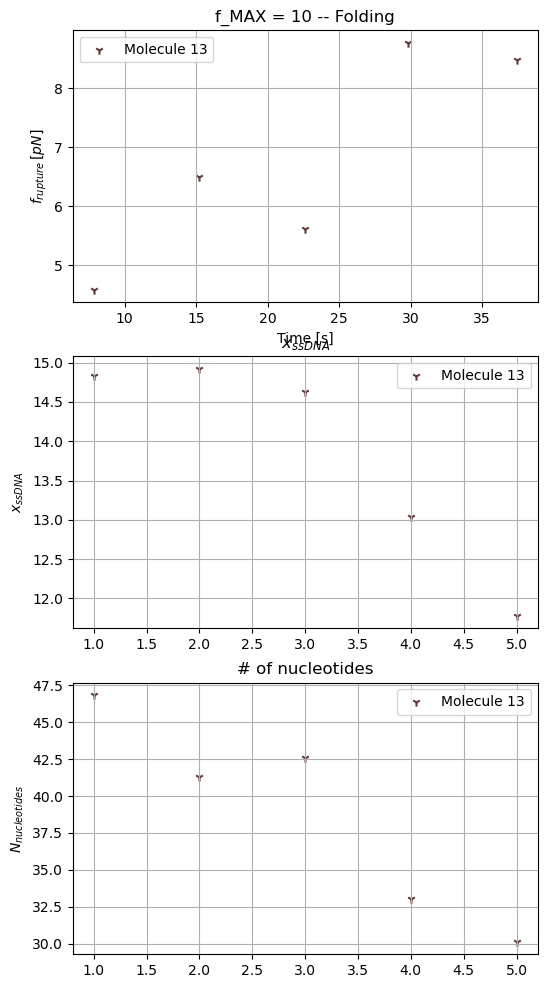

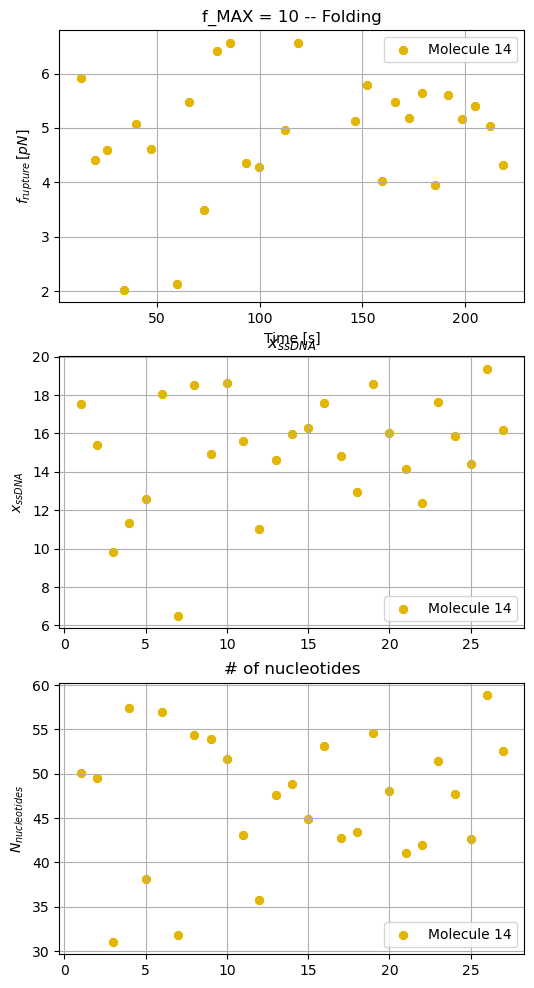

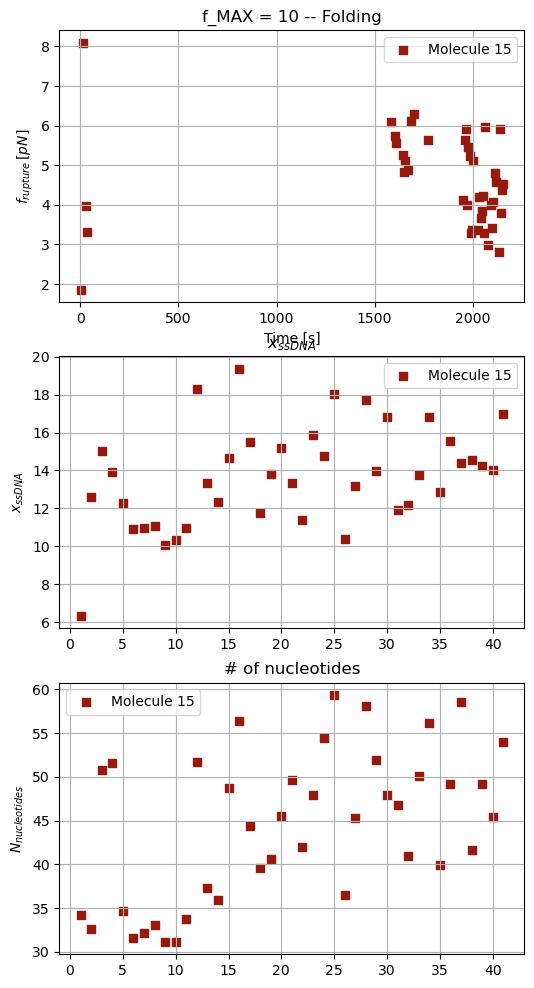

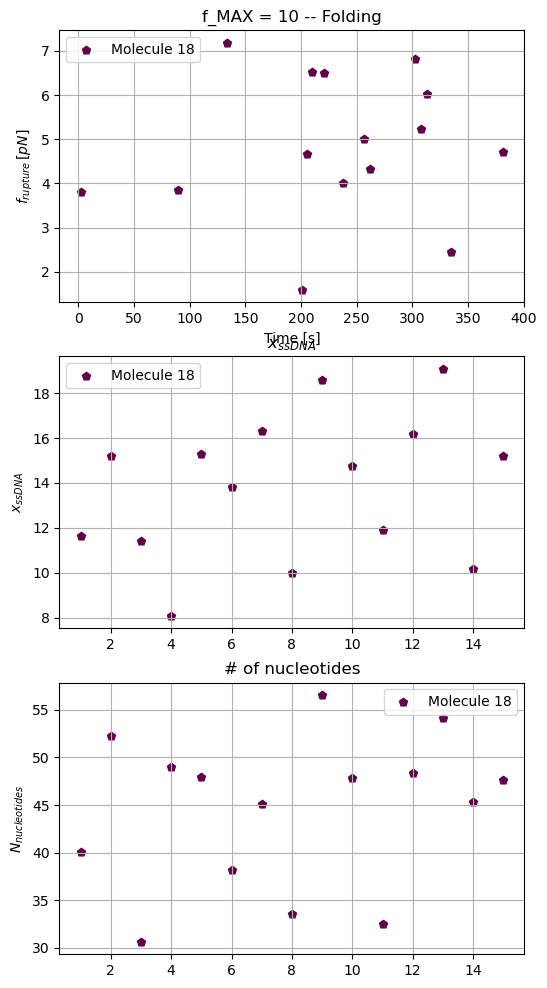

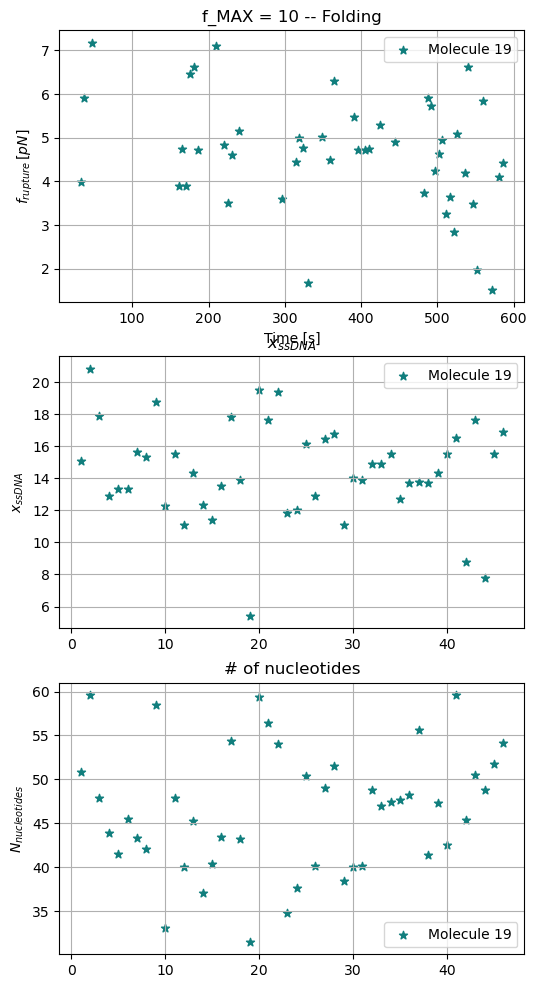

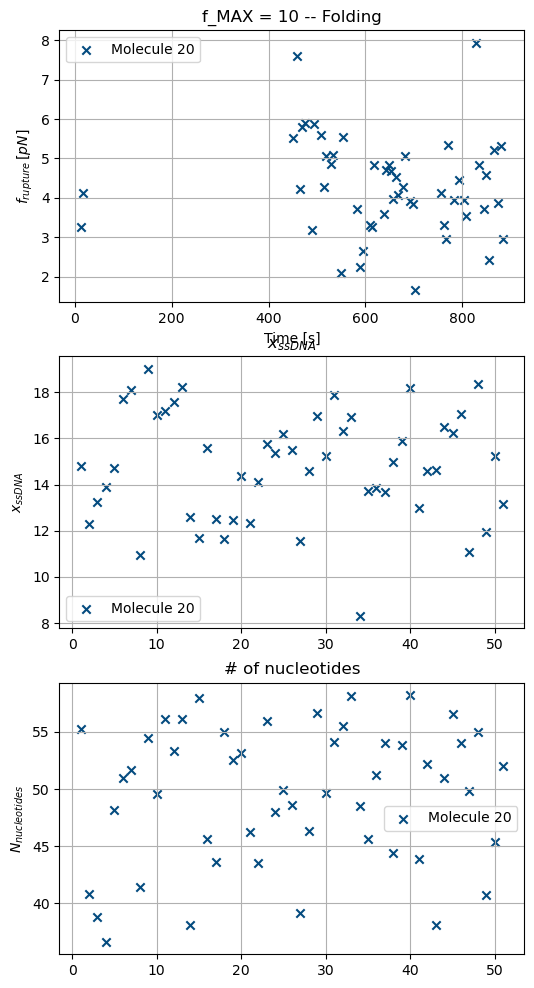

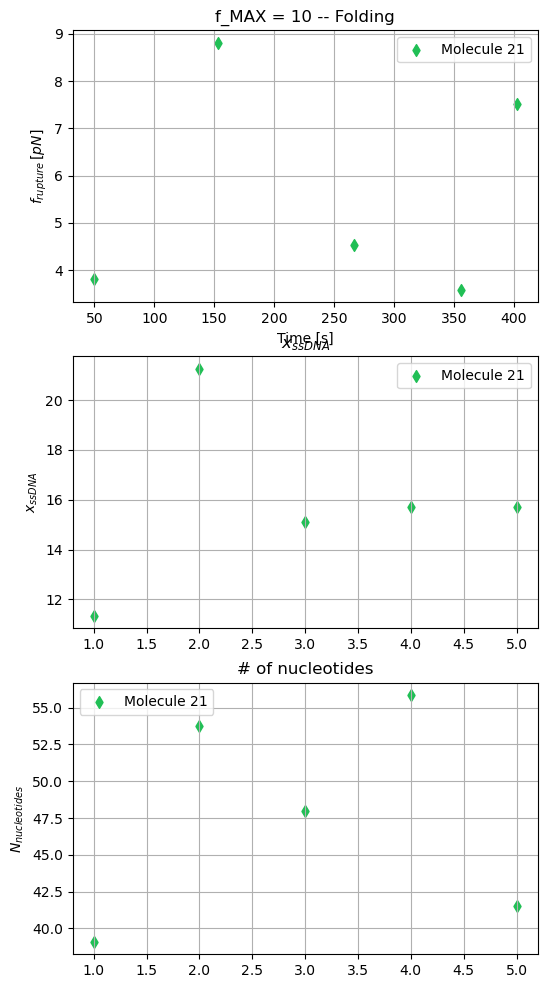

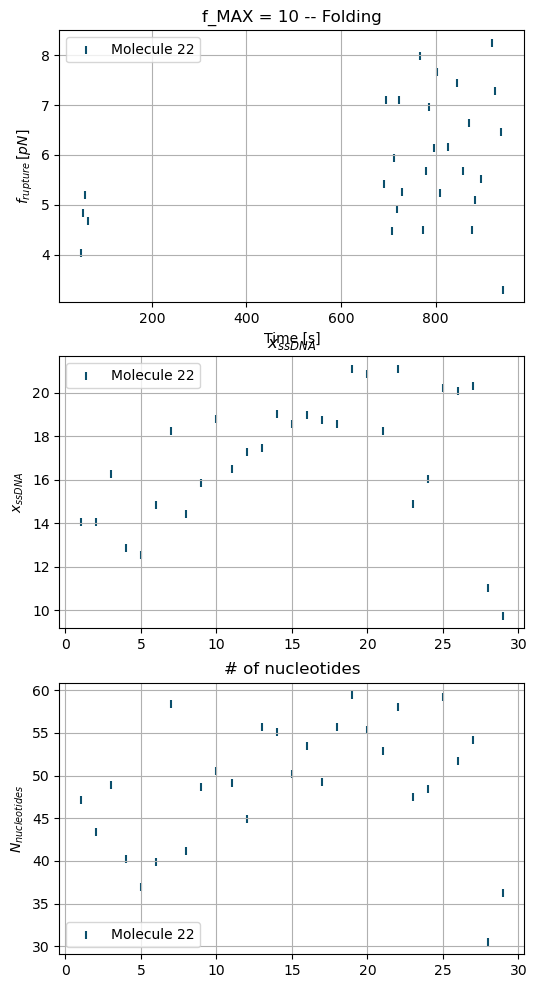

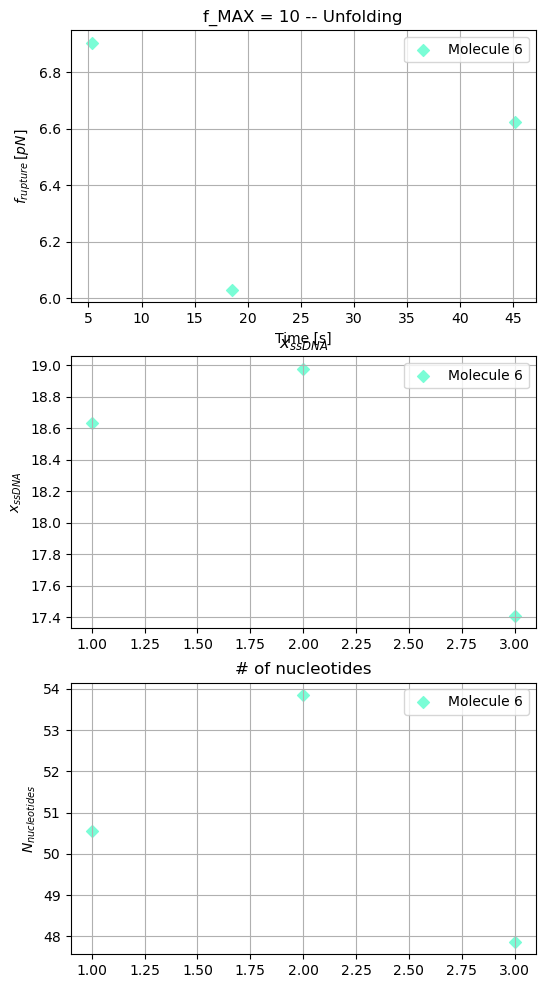

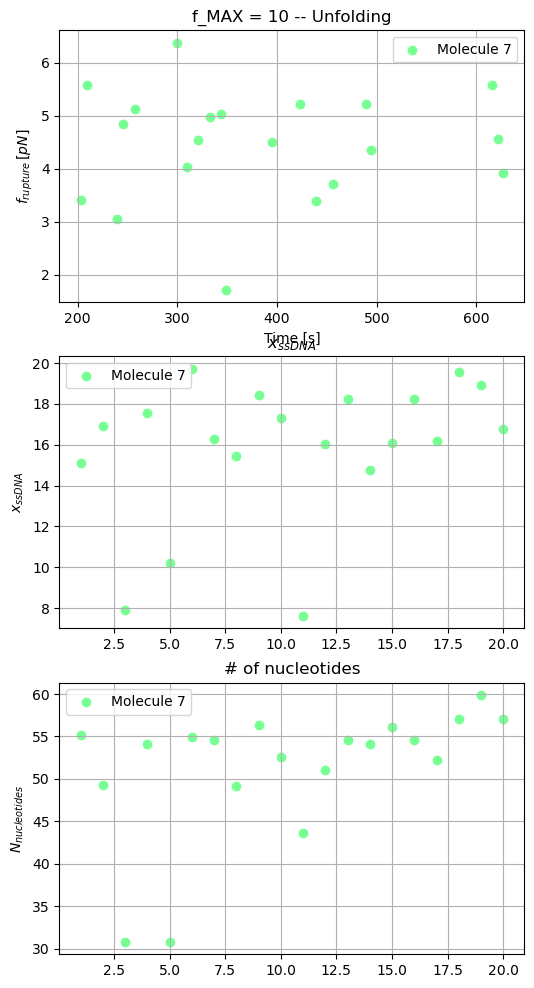

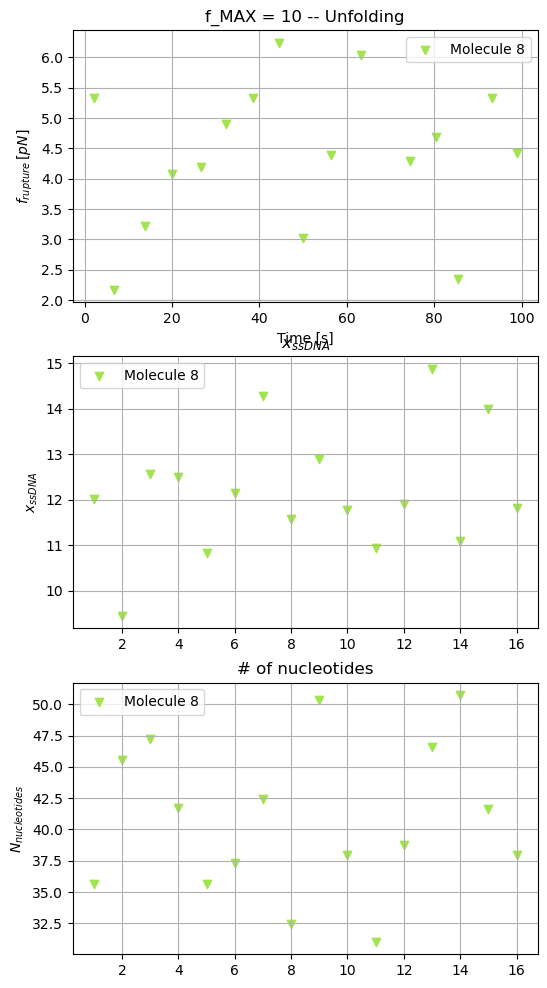

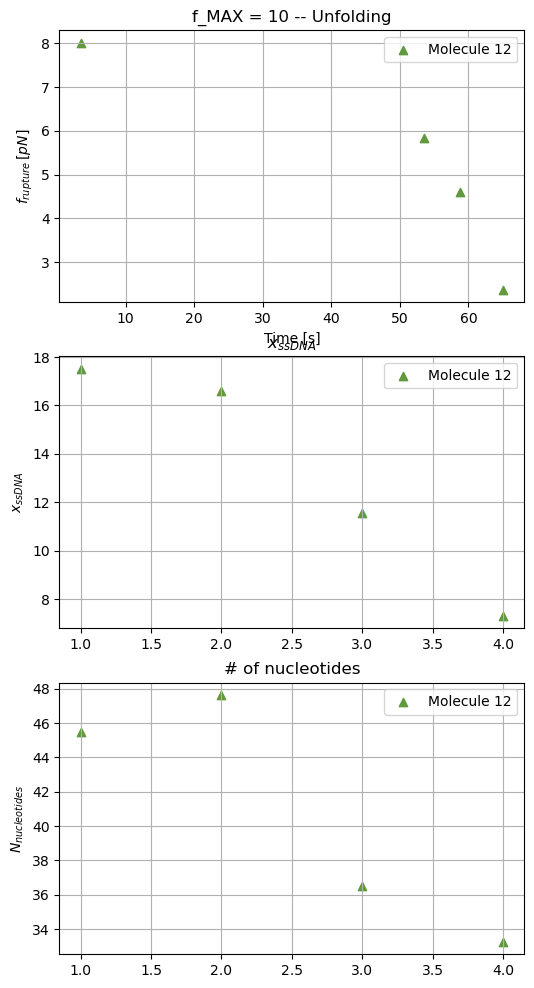

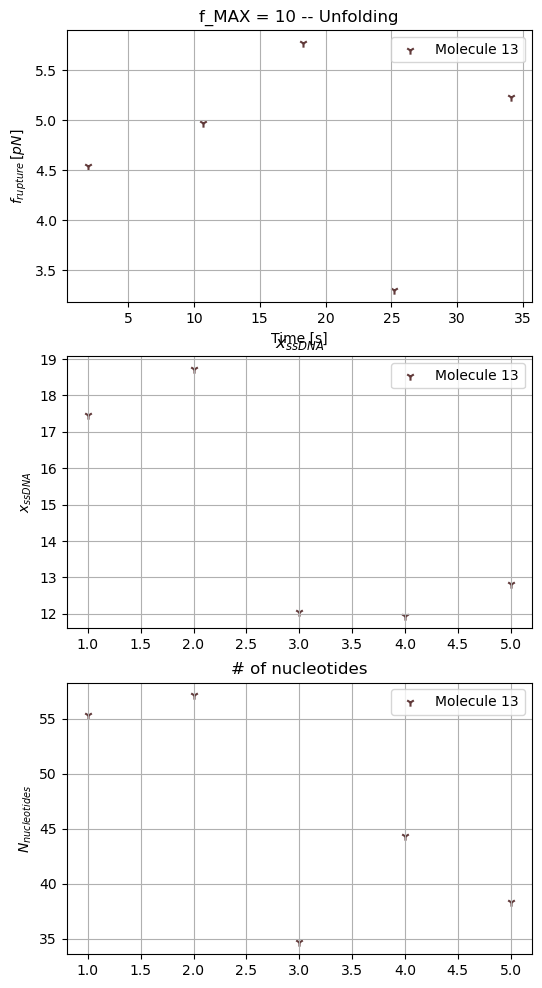

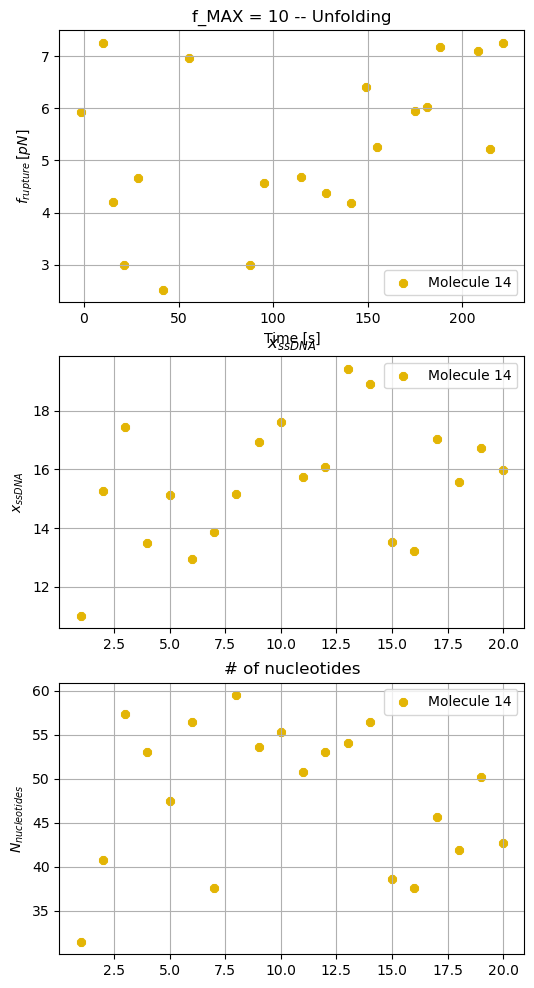

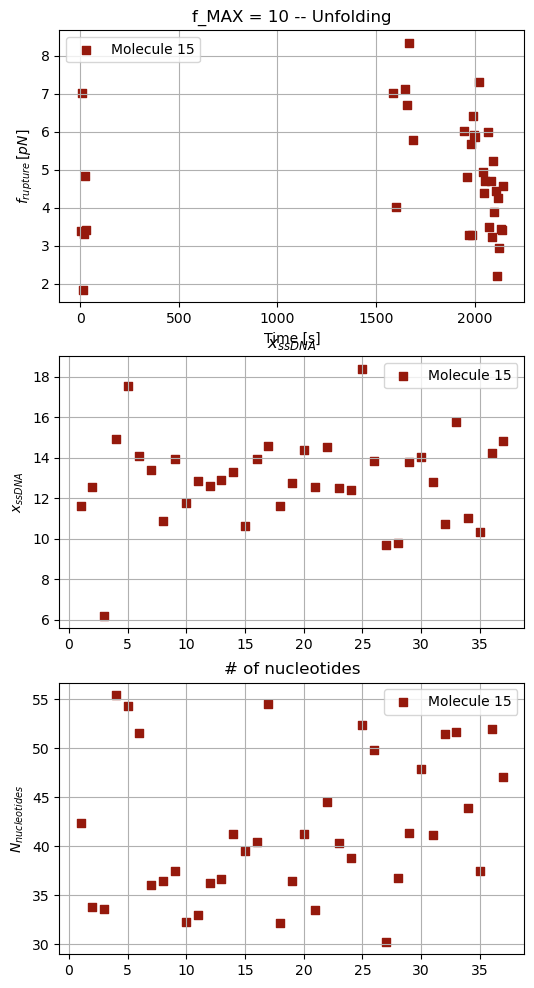

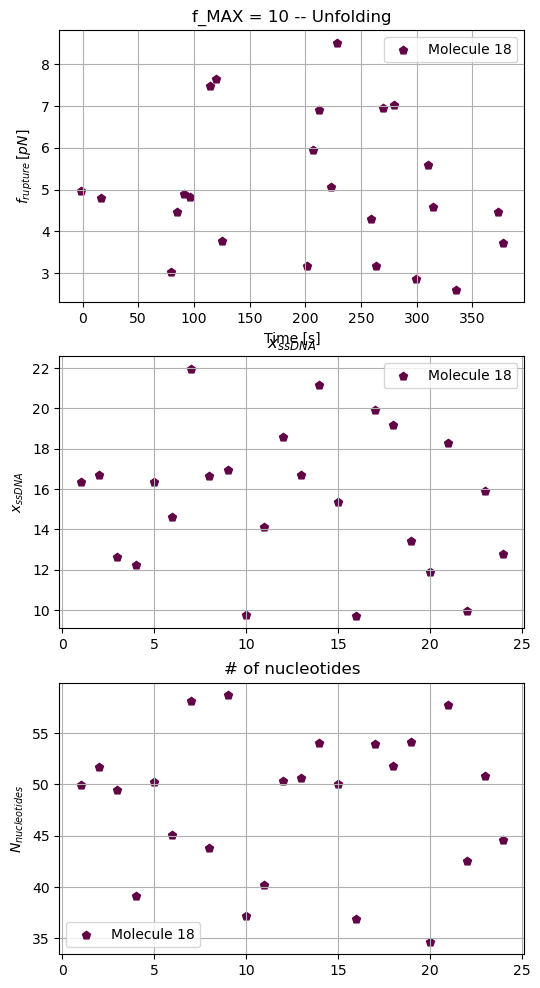

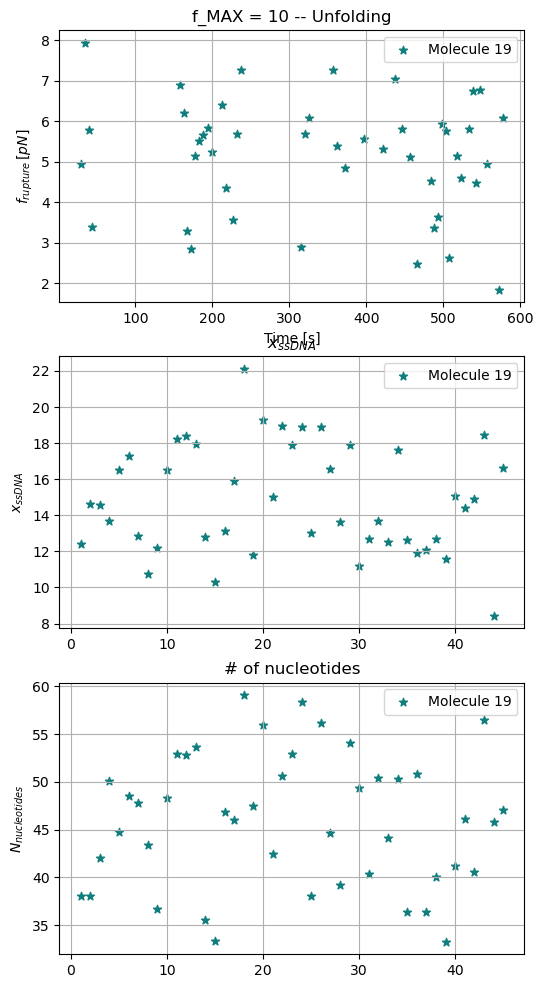

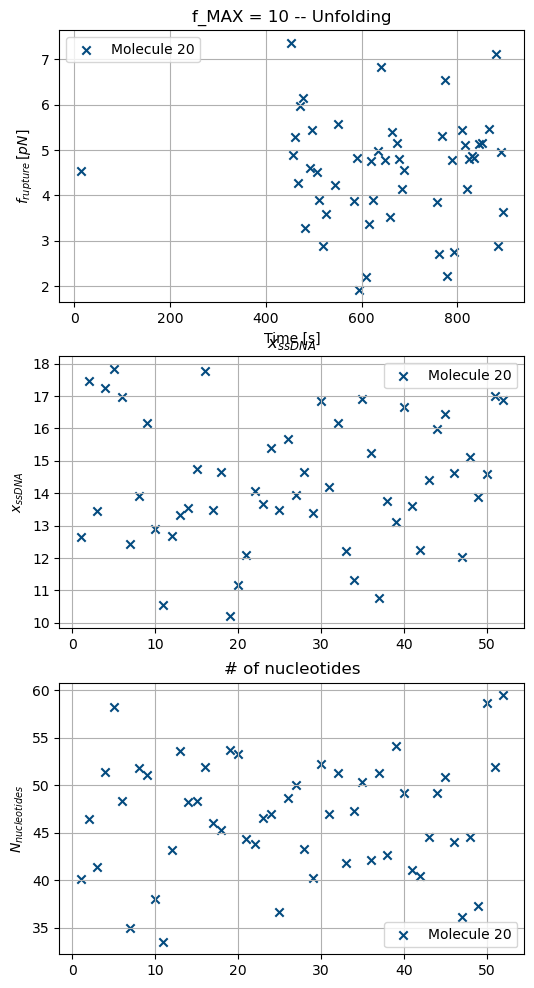

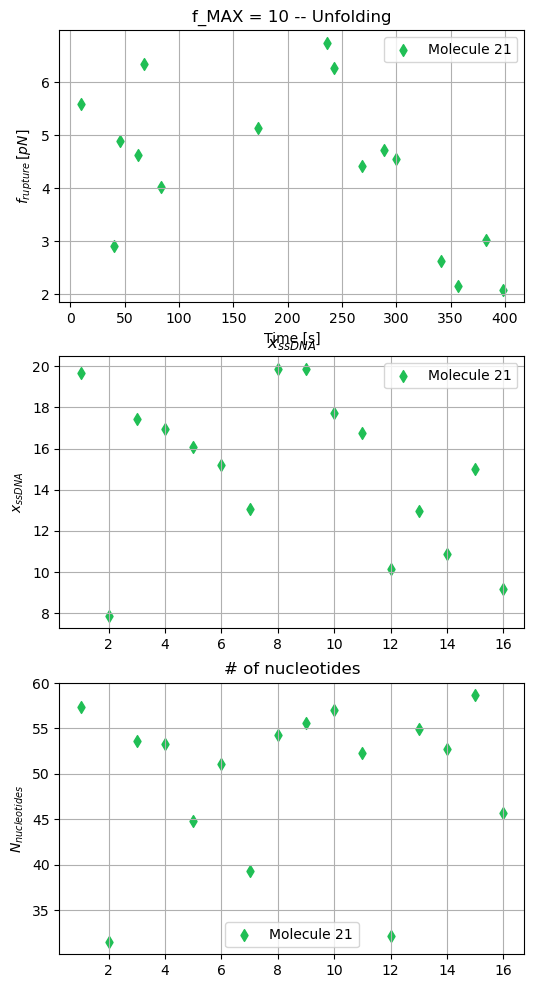

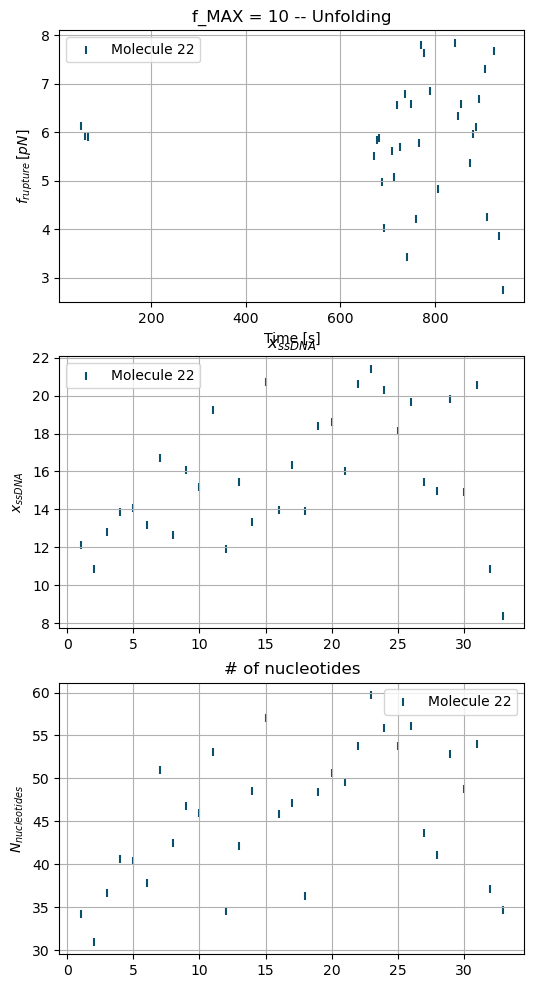

Maximum force = 15


FileNotFoundError: [WinError 3] Impossibile trovare il percorso specificato: 'F:/Zaltron & Xavi/0nM/'

In [6]:
for f_max in f_MAX:
    print(f'Maximum force = {f_max}')
    reading = Txt_Reading(folder, f_max)
    molecules, all_molecules_f, all_molecules_u = reading.sequential_analysis(print_not_saved=False, save_files=save_files)
    # Create folder for images
    images_path = f'imgs/{folder}/{f_max}'
    isExist = os.path.exists(images_path)
    if not isExist:
        os.makedirs(images_path)
        print("The images directory is created...")
        
    plots3(molecules, all_molecules_f, folder, f_max, 'Folding', save_plots)
    plots3(molecules, all_molecules_u, folder, f_max, 'Unfolding', save_plots)

    # Plots per single molecule
    plot_single_molecule(molecules, all_molecules_f, folder, f_max, 'Folding', save_plots)
    plot_single_molecule(molecules, all_molecules_u, folder, f_max, 'Unfolding', save_plots)
    